In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date
from scipy.stats import mode
df = pd.read_sql('SELECT * FROM superstore', con=engine)

df['order date'] = pd.to_datetime(df['order date'])
df['ship date'] = pd.to_datetime(df['ship date'])

df.columns
df = df.rename(columns={'order date': 'Order Date', 'ship date': 'Ship Date'})

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.914,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.00,219.582,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.00,6.871,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577,5,0.45,-383.031,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,2.516,2015,10



### Logistic Regression Interpretation

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Crear la variable objetivo binaria
df['Profitable'] = (df['Profit'] > 0).astype(int)


# Variable/Feature Engineering
features = ['Discount', 'Category', 'Sub-Category', 'Region', 'Quantity']

# Get Dummies
df_model = pd.get_dummies(df[features], drop_first=True)    # Convert categorical variables into dummy/indicator variables


# 3. Scale numeric variables

numeric_cols = df_model.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])


# Train model
X = df_model
y = df['Profitable']

model = LogisticRegression(max_iter=2000)


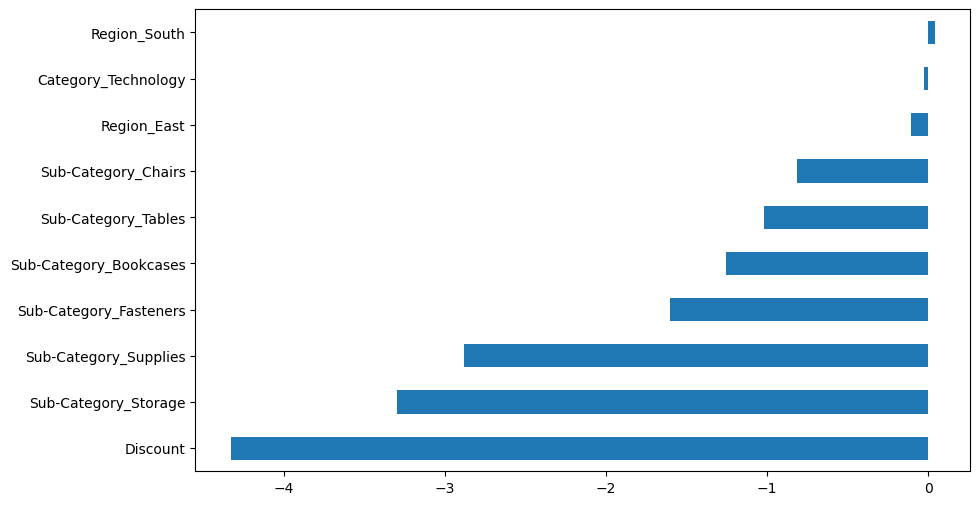

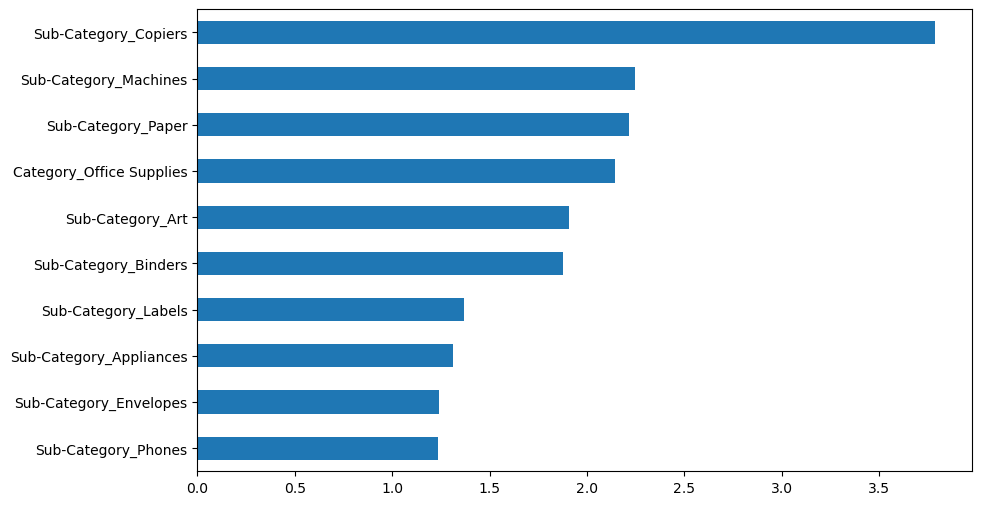

In [ ]:
# Obtener la importancia de las variables (coeficientes)
importance = pd.Series(model.coef_[0], index=X.columns)

# Seleccionar las 10 más negativas y 10 más positivas
top_positive = importance.sort_values(ascending=False).head(10)
top_negative = importance.sort_values(ascending=True).head(10)

# Combinar y ordenar
top_features = pd.concat([top_negative, top_positive])
colors = ['red' if val < 0 else 'green' for val in top_features]

# Visualización
plt.figure(figsize=(12, 8))
top_features.sort_values().plot(kind='barh', color=colors)
plt.title('🔍 Top Variables Impacting Profitability (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 🔍 Results Interpretation
The logistic regression model reveals several insightful patters about what influences whether a sale is profitable.

- **Discount** shows a **strong negative influence on profitability**. This supports our earlier hypothesis and is consistent across other methods such as linear regression and random forest feature importance.
-  **Quantity**, on the other hand, does not appear to be a significant predictor in this logistic regression model. This may suggest that simply selling more units **doesn't directly translate into higher profitability.** The impact of quantity likely depends on other variables such as discount rates, product types, or cost structures, which may be captured elsewhere in the model.
-   The **"Copiers"** Sub-Category shows a **very high positive association** with profitability. Followed by Sub-Categories **"Machines"**, **"Paper"**, and the overall **"Office Supplies" Category** — all of which show a tendency to yield positive profit margins more frequently.
-   On the other hand: Sub-Categories **Storage, Supplies, Fasteners, Bookcases** and **Tables**, show **negative influence on profitability**
  
However, it’s important to highlight that **discount** is such a powerful predictor of profitability that it overshadows many of the other variables. Its influence is so strong that it distorts the final resolution — making it harder to isolate the impact of features like product type or region without its dominating effect. This confirms one of our key insights: **discounts, while common, come at a serious cost to profitability.**


